In [24]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df['User_ID'].nunique()#no of unique users

5891

In [9]:
df['Product_ID'].nunique()

3623

In [11]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

# Gender analysis

<Axes: title={'center': 'Gender Ratio'}>

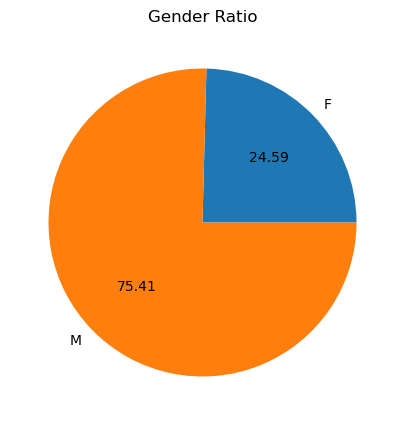

In [18]:
df.groupby('Gender').size().plot(kind="pie", autopct = "%.2f" , figsize= (5,5) , title = 'Gender Ratio')

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

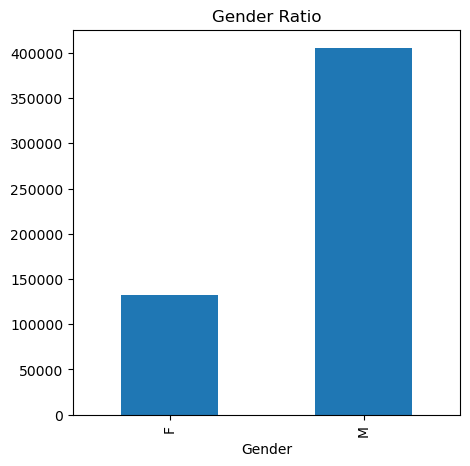

In [19]:
df.groupby('Gender').size().plot(kind="bar" , figsize= (5,5) , title = 'Gender Ratio')

# Age and marital Status


<Axes: title={'center': 'Purchase distribution by age'}, xlabel='Age'>

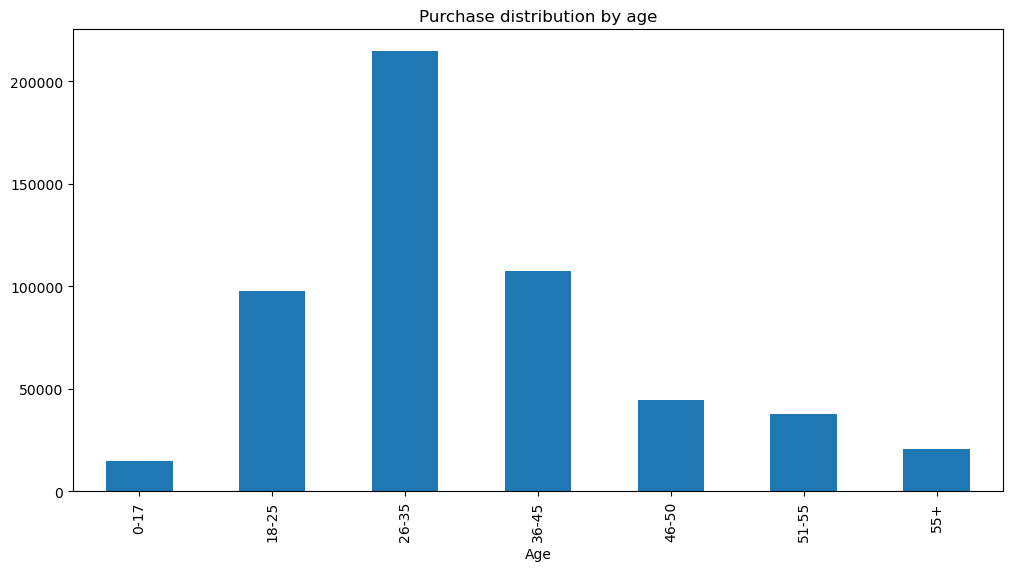

In [11]:
df.groupby('Age').size().plot(kind = "bar" , figsize = (12,6) , title = "Purchase distribution by age")

In [12]:
for i in df['Age'].unique():
    print(i , ":" , len(df[df['Age']==i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [17]:
# for unique product purchase in age group
lst = []
for i in df['Age'].unique():
    lst.append([i , df[df['Age']==i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age', 'Products'])

<Axes: xlabel='Age'>

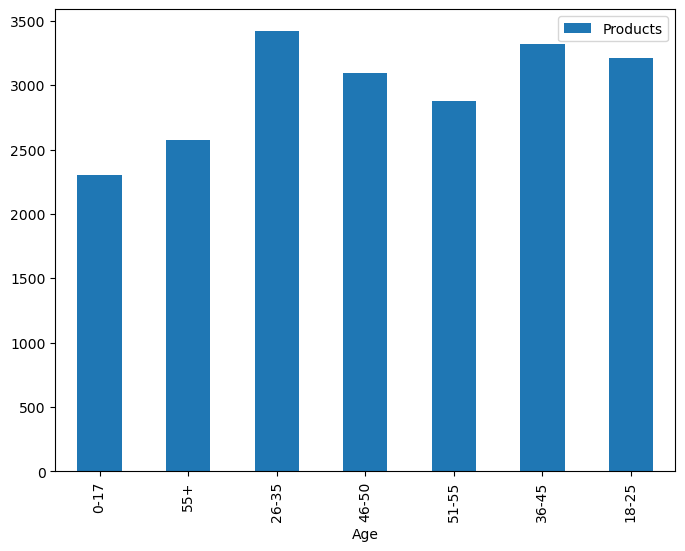

In [20]:
data.plot(kind='bar', x = 'Age' , figsize=(8,6))

<Axes: title={'center': 'Amount spend by age group'}, xlabel='Age'>

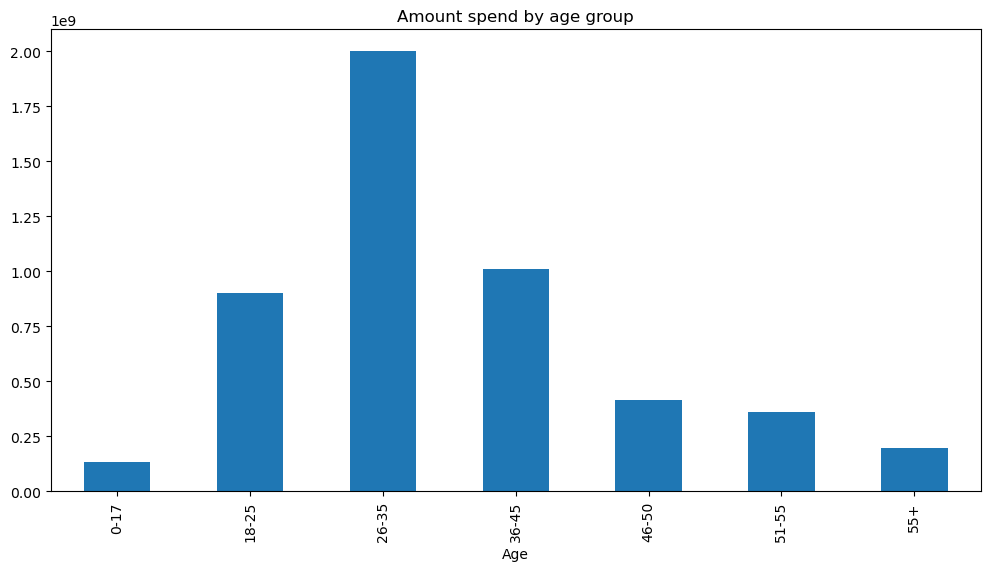

In [22]:
df.groupby('Age').sum()['Purchase'].plot(kind="bar" , figsize= (12,6) , title = 'Amount spend by age group')

<Axes: >

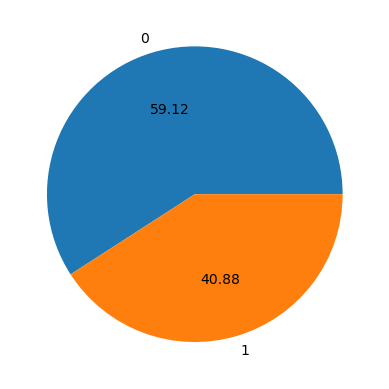

In [23]:
df.groupby('Marital_Status').size().plot(kind = 'pie' , autopct = "%.2f")

# multiple column analysis


<Axes: xlabel='Age', ylabel='count'>

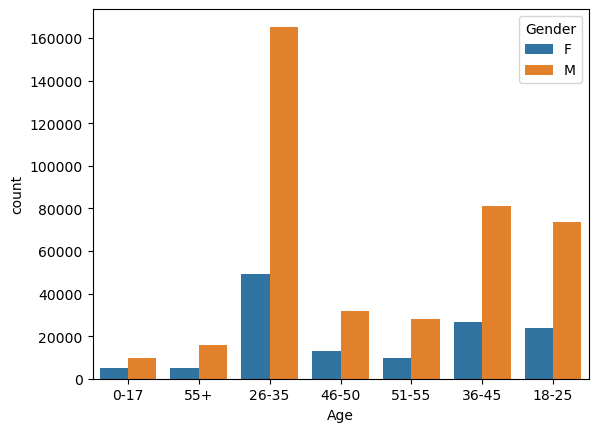

In [25]:
sns.countplot(x='Age',hue = 'Gender', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

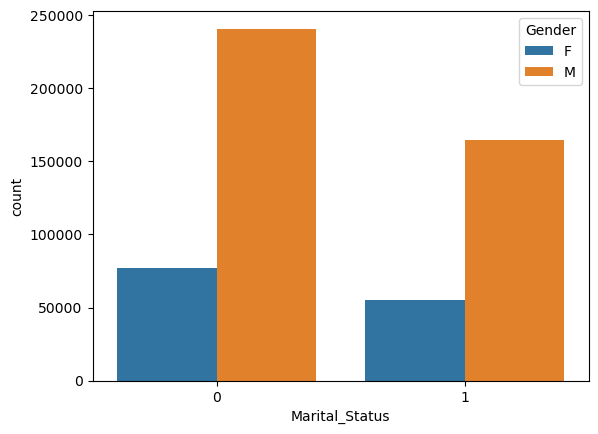

In [26]:
sns.countplot(x='Marital_Status',hue = 'Gender', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

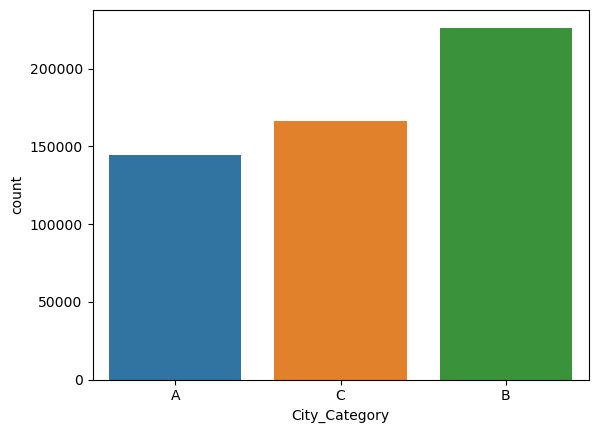

In [27]:
sns.countplot(x = df['City_Category'])

<Axes: >

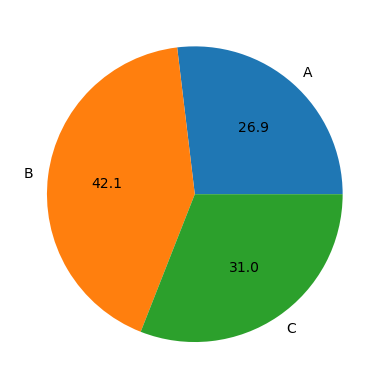

In [28]:
df.groupby('City_Category').size().plot(kind= "pie" , autopct = '%.1f')